# **Hands-on 4: Logistic Regression Notebook (Tutorial)**

## **Fundamentos de la tecnica**

La Regresión Logística es una técnica de aprendizaje supervisado utilizada en problemas de clasificación, especialmente cuando la variable objetivo es binaria (0/1).
Su propósito es estimar la probabilidad de que una instancia pertenezca a una clase específica, para luego asignarla a la categoría más probable.

El modelo utiliza la función logística (o sigmoide), la cual transforma un valor real en un rango entre 0 y 1. Dicho comportamiento le permite funcionar como clasificador probabilístico.

## **Modelo matematico**

### **Modelo:**

$$
P(Y = 1 \mid x) = \frac{1}{1 + e^{-w^{T}x}}
$$

$$
P(Y = 0 \mid x) = \frac{1}{1 + e^{-w^{T}x}}
$$




### **Funcion de Perdida:**

$$
y = \mathcal{L}(w) = -\sum_{i}\left[ y_{i}\log\hat{y}_{i} + (1 - y_{i})\log\left(1 - \hat{y}_{i}\right)\right]
$$
`

## **Descripción de la librería, clases, funciones en su respectiva sección**

> *Se explicara en cada seccion cuando se vaya a utilizar*  

## **Pipeline**

### **Preprocesamiento**

Utilizaremos las siguientes librerias para esta seccion de preprocesamiento.  
* Pandas: Lo utilizaremos para todo lo relacionado a la manipulacion de nuestro dataset.  
* seaborn: Este lo utilizaremos para generar nuestros visuales basandose en nuesras estadisticas (mejores estilos visuales)  
* matplotlib: Libreria usada para mostrar los graficos que construyamos junto con seaborn.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Cargamos el dataset:

In [2]:
dataset = pd.read_csv("heart.csv")

Utilizamos info para conocer la estructura de nuestro dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Obtenemos las estadisticas basicas como: avg, desv std, max, min.. entre otros.

In [4]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Generaremos un pairplot general para ver la distribucion de nuestra variable objetivo en contraste con el resto de las variables de apoyo.

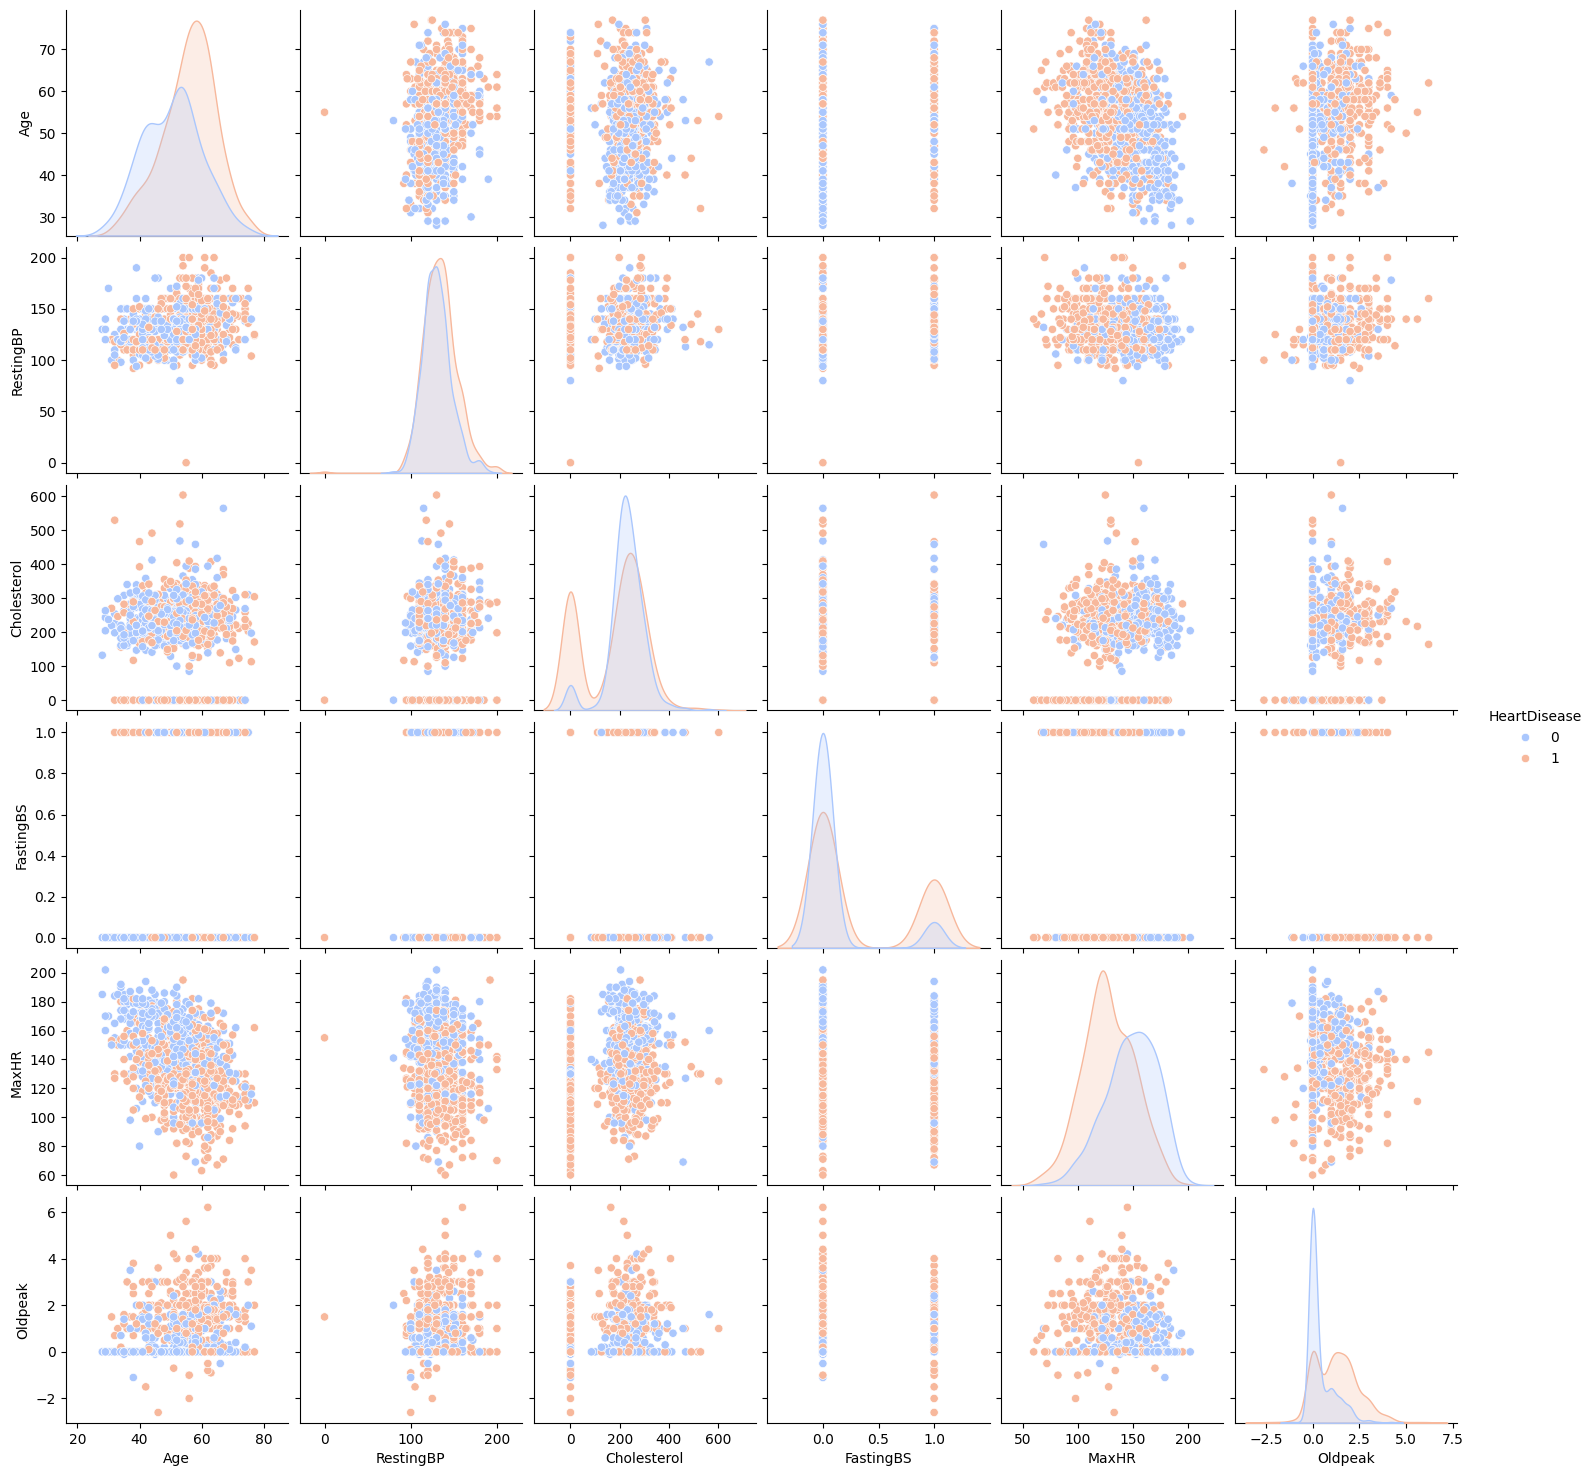

In [5]:
sns.pairplot(dataset, hue="HeartDisease", palette="coolwarm")
plt.show()

Estandarizaremos nuestros valores numericos con ayuda del metodo StandardScaler

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak','FastingBS']

dataset_num = dataset[num_cols]

scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset_num)

### **Entrenamiento**

Entrenamos el modelo de regresión logística usando las características estandarizadas.  
También dividimos los datos en entrenamiento y prueba para evaluar el desempeño de manera realista.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = dataset["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(dataset_scaled, y, test_size=0.2, random_state=42)
modelo = LogisticRegression(max_iter=500)
modelo.fit(X_train, y_train)


LogisticRegression(max_iter=500)

### **Prediction**


Definimos una función que reciba un diccionario con las características de un nuevo paciente y devuelva la clase predicha por el modelo.

In [9]:
def clasificar(instancia):
    df = pd.DataFrame([instancia])
    df_scaled = scaler.transform(df)
    pred = modelo.predict(df_scaled)[0]
    df["Prediccion"] = pred
    return pred, df

# Ejemplo
nueva_instancia = {
    "Age": 55,
    "RestingBP": 140,
    "Cholesterol": 200,
    "MaxHR": 150,
    "Oldpeak": 1.2,
    "FastingBS": 1
}

pred, resultado = clasificar(nueva_instancia)
resultado


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,Prediccion
0,55,140,200,150,1.2,1,1


### **Model Evaluation**

En esta sección evaluamos el rendimiento del modelo con:

- **Matriz de confusión:** muestra aciertos y errores en cada clase.
- **Accuracy:** porcentaje total de predicciones correctas.

Ambas métricas nos permiten entender el comportamiento global del clasificador.

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)



#### **Matriz de Confusion**

In [11]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)


Matriz de Confusión:
[[57 20]
 [28 79]]


#### **Accuracy**

In [12]:
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy:", acc)


Accuracy: 0.7391304347826086


## **Referencias**

Aviña Méndez, J. A. (2025). *Modelo Matemático de la Regresión Logística* [Diapositiva de clase]. Material del curso, Google Classroom.